# title

## runtime-breakdown

### original h1


In [43]:
import matplotlib.pyplot as plt
# import csv
import os
import numpy as np

In [44]:
dir_path = os.path.abspath('')

with open(dir_path+"/vrf-runtime-breakdown/stat.csv") as breakdown_file: 
    lines = breakdown_file.readlines()

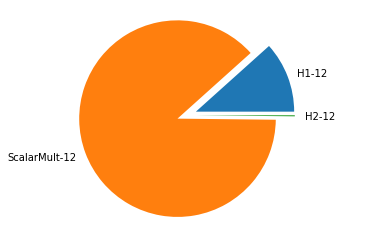

In [45]:
labels = []
sizes = []
explode = []
for i in range(len(lines)):
    if lines[i].startswith("name,time/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, explode=explode)
plt.axis('equal')
plt.show()

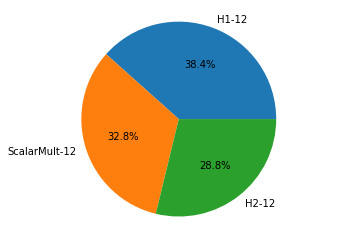

In [46]:
labels = []
sizes = []
for i in range(len(lines)):
    if lines[i].startswith("name,alloc/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

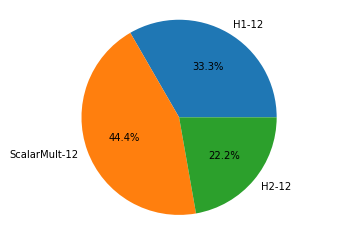

In [47]:
labels = []
sizes = []
for i in range(len(lines)):
    if lines[i].startswith("name,allocs/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## runtime-comparison

In [48]:
with open(dir_path+"/runtime-comparison/stat.csv") as comparison_file: 
    lines = comparison_file.readlines()

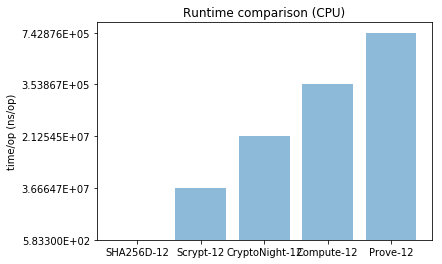

In [49]:
algos = []
performances = []
for i in range(len(lines)):
    if lines[i].startswith("name,time/op"):
        for j in range(1, 6):
            data = lines[i+j].split(",")
            algos.append(data[0])
            performances.append(data[1])

y_pos = np.arange(len(algos))
plt.bar(y_pos, performances, align='center', alpha=0.5)
plt.xticks(y_pos, algos)
plt.ylabel('time/op (ns/op)')
plt.title('Runtime comparison (CPU)')

plt.show()

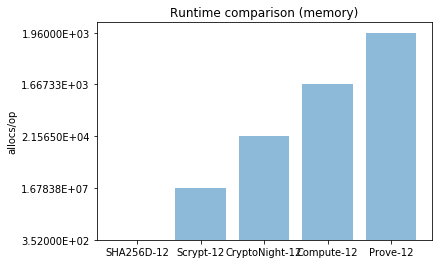

In [50]:
algos = []
performances = []
for i in range(len(lines)):
    if lines[i].startswith("name,alloc/op"):
        for j in range(1, 6):
            data = lines[i+j].split(",")
            algos.append(data[0])
            performances.append(data[1])

y_pos = np.arange(len(algos))
plt.bar(y_pos, performances, align='center', alpha=0.5)
plt.xticks(y_pos, algos)
plt.ylabel('allocs/op')
plt.title('Runtime comparison (memory)')

plt.show()

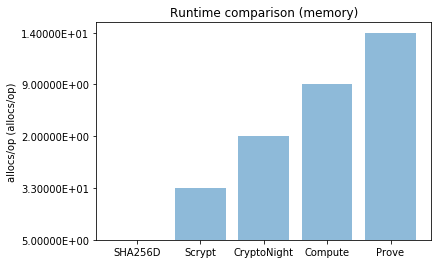

In [51]:
algos = []
performances = []
for i in range(len(lines)):
    if lines[i].startswith("name,allocs/op"):
        for j in range(1, 6):
            data = lines[i+j].split(",")
            algos.append(data[0][:-3])
            performances.append(data[1])

y_pos = np.arange(len(algos))
plt.bar(y_pos, performances, align='center', alpha=0.5)
plt.xticks(y_pos, algos)
plt.ylabel('allocs/op (allocs/op)')
plt.title('Runtime comparison (memory)')

plt.show()